In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Crimes-One_Year_Prior_to_Present (Smaller Dataset)

In [4]:
# Reload the dataset after user re-upload
file_path_2 = 'db_two_cleaned.csv'

data = pd.read_csv(file_path_2)

In [5]:
# Specifying the date format explicitly to avoid the warning
data['TIME OF OCCURRENCE'] = pd.to_datetime(
    data['DATE  OF OCCURRENCE'], format="%m/%d/%Y %I:%M:%S %p"
).dt.time


In [6]:
# Define a function to classify time into categories
def classify_time_of_day(time):
    if time >= pd.Timestamp("06:00:00").time() and time < pd.Timestamp("12:00:00").time():
        return "Morning"
    elif time >= pd.Timestamp("12:00:00").time() and time < pd.Timestamp("18:00:00").time():
        return "Afternoon"
    elif time >= pd.Timestamp("18:00:00").time() and time < pd.Timestamp("00:00:00").time():
        return "Evening"
    else:
        return "Late Night"

# Apply the classification to the "TIME OF OCCURRENCE" column
data['TIME OF DAY'] = data['TIME OF OCCURRENCE'].apply(classify_time_of_day)

# Check the updated DataFrame
print(data[['DATE  OF OCCURRENCE', 'TIME OF OCCURRENCE', 'TIME OF DAY']].head())


      DATE  OF OCCURRENCE TIME OF OCCURRENCE TIME OF DAY
0  03/07/2024 06:38:00 PM           18:38:00  Late Night
1  03/07/2024 02:10:00 PM           14:10:00   Afternoon
2  03/07/2024 04:45:00 AM           04:45:00  Late Night
3  03/07/2024 07:00:00 PM           19:00:00  Late Night
4  03/07/2024 12:08:00 AM           00:08:00  Late Night


# Crime Distribution by Time of Day

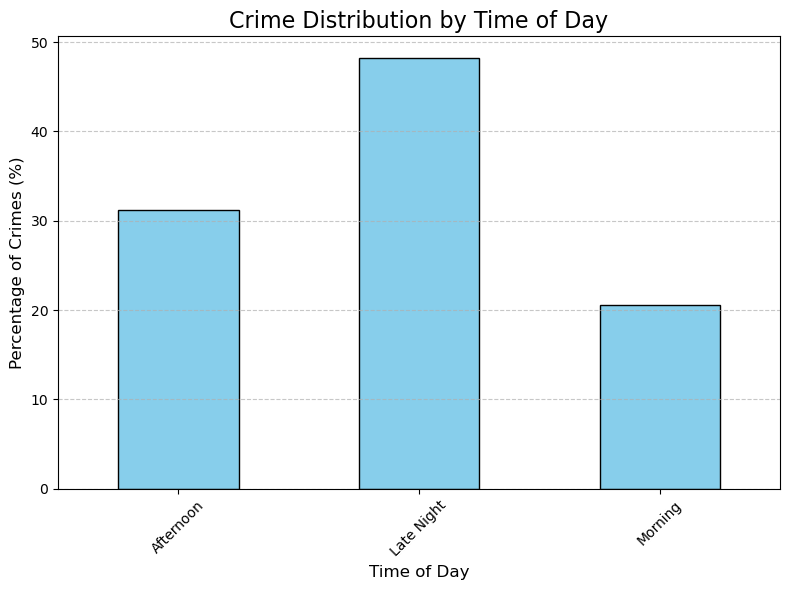

In [10]:
time_of_day_distribution = data['TIME OF DAY'].value_counts(normalize=True) * 100

# Plotting the distribution again
plt.figure(figsize=(8, 6))
time_of_day_distribution.sort_index().plot(kind='bar', color='skyblue', edgecolor='black')

# Add labels and title for clarity
plt.title('Crime Distribution by Time of Day', fontsize=16)
plt.xlabel('Time of Day', fontsize=12)
plt.ylabel('Percentage of Crimes (%)', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Show the plot
plt.show()


In [11]:
# Stripping whitespace from column names for consistency
data.columns = data.columns.str.strip()

# Grouping the data by TIME OF DAY and PRIMARY DESCRIPTION
crime_trends = data.groupby(['TIME OF DAY', 'PRIMARY DESCRIPTION']).size().reset_index(name='COUNT')

# Finding the most frequent crime for each time of day
most_frequent_crimes = crime_trends.loc[crime_trends.groupby('TIME OF DAY')['COUNT'].idxmax()]

In [12]:
# Group the data by TIME OF DAY and PRIMARY DESCRIPTION and count occurrences
crime_trends = data.groupby(['TIME OF DAY', 'PRIMARY DESCRIPTION']).size().reset_index(name='COUNT')

# Distribution of Crimes in the Morning

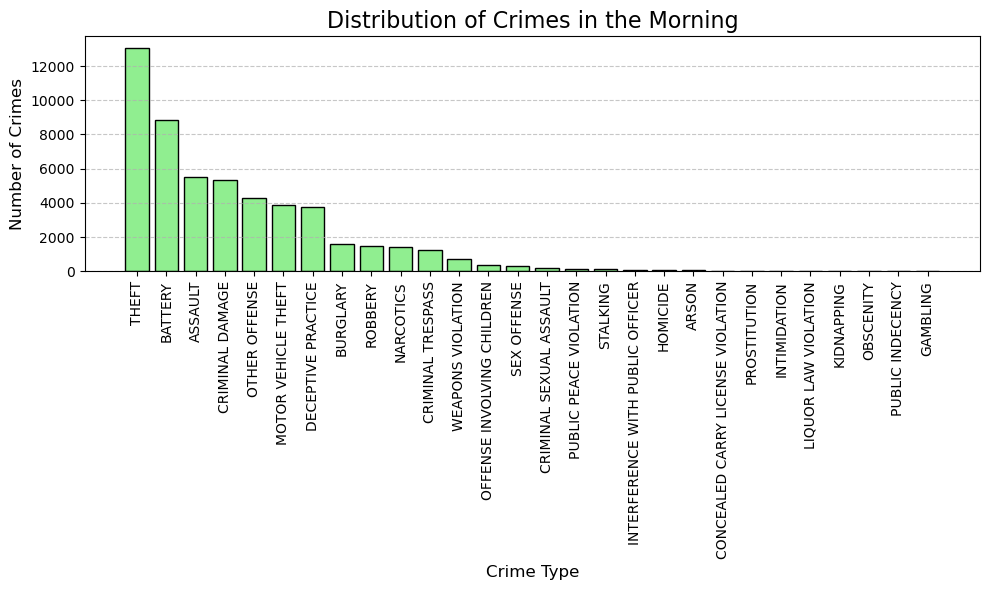

In [13]:
# Filtering the crimes for the "Morning" time of day
morning_crimes = crime_trends[crime_trends['TIME OF DAY'] == 'Morning']

# Sorting the crimes by count for better visualization
morning_crimes = morning_crimes.sort_values(by='COUNT', ascending=False)

# Plotting the distribution of crimes in the Morning
plt.figure(figsize=(10, 6))
plt.bar(morning_crimes['PRIMARY DESCRIPTION'], morning_crimes['COUNT'], color='lightgreen', edgecolor='black')

# Adding titles and labels for clarity
plt.title('Distribution of Crimes in the Morning', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


# Distribution of Crime in the Afternoon

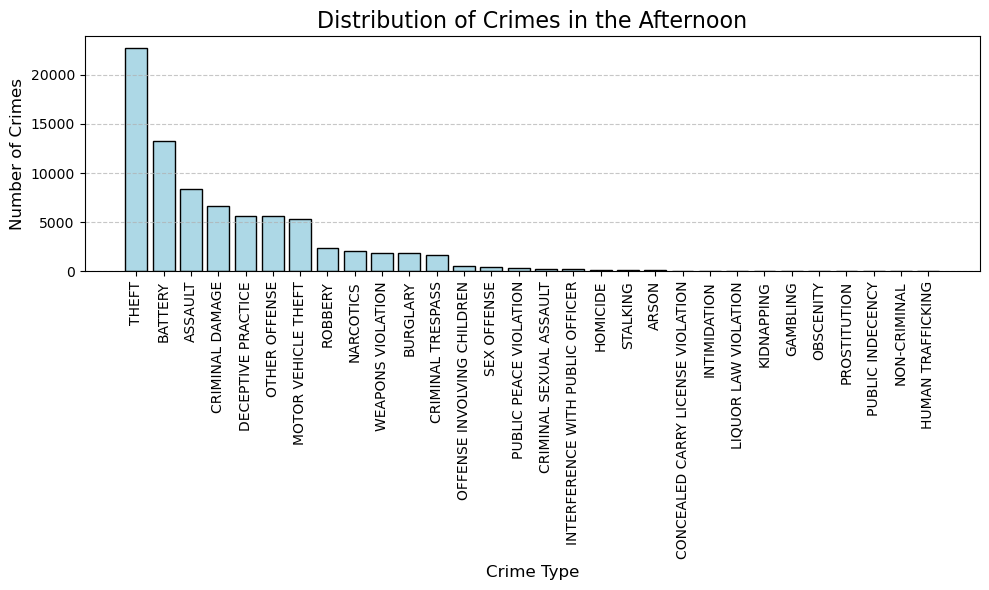

In [14]:
# Filtering the crimes for the "Afternoon" time of day
afternoon_crimes = crime_trends[crime_trends['TIME OF DAY'] == 'Afternoon']

# Sorting the crimes by count for better visualization
afternoon_crimes = afternoon_crimes.sort_values(by='COUNT', ascending=False)

# Plotting the distribution of crimes in the Afternoon
plt.figure(figsize=(10, 6))
plt.bar(afternoon_crimes['PRIMARY DESCRIPTION'], afternoon_crimes['COUNT'], color='lightblue', edgecolor='black')

# Adding titles and labels for clarity
plt.title('Distribution of Crimes in the Afternoon', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


# Distribution of Crimes in Late Night

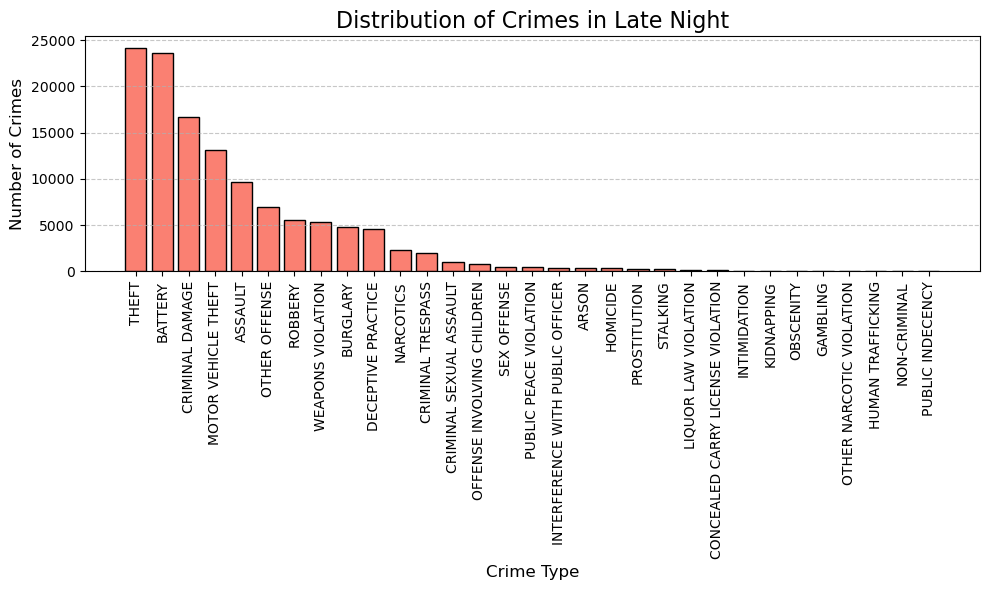

In [15]:
# Filtering the crimes for the "Late Night" time of day
late_night_crimes = crime_trends[crime_trends['TIME OF DAY'] == 'Late Night']

# Sorting the crimes by count for better visualization
late_night_crimes = late_night_crimes.sort_values(by='COUNT', ascending=False)

# Plotting the distribution of crimes in the Late Night
plt.figure(figsize=(10, 6))
plt.bar(late_night_crimes['PRIMARY DESCRIPTION'], late_night_crimes['COUNT'], color='salmon', edgecolor='black')

# Adding titles and labels for clarity
plt.title('Distribution of Crimes in Late Night', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=90, fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the plot
plt.show()


In [16]:
# Grouping the data by TIME OF DAY, PRIMARY DESCRIPTION, and LOCATION DESCRIPTION
time_crime_location = data.groupby(['TIME OF DAY', 'PRIMARY DESCRIPTION', 'LOCATION DESCRIPTION']).size().reset_index(name='COUNT')

# Sorting the data for better readability
time_crime_location = time_crime_location.sort_values(by=['TIME OF DAY', 'COUNT'], ascending=[True, False])

# Splitting the data by time of day: Morning, Afternoon, and Late Night
morning_data = time_crime_location[time_crime_location['TIME OF DAY'] == 'Morning']
afternoon_data = time_crime_location[time_crime_location['TIME OF DAY'] == 'Afternoon']
late_night_data = time_crime_location[time_crime_location['TIME OF DAY'] == 'Late Night']

# Identifying the highest number of crimes in the Morning table and its location
highest_morning_crime = morning_data.loc[morning_data['COUNT'].idxmax()]

# Filtering the Morning data for Theft occurrences
morning_theft_mapping = morning_data[morning_data['PRIMARY DESCRIPTION'] == 'THEFT']

# Filtering the data for the specified locations: 'CTA BUS' and 'CTA TRAIN'
cta_bus_crimes = data[data['LOCATION DESCRIPTION'] == 'CTA BUS']
cta_train_crimes = data[data['LOCATION DESCRIPTION'] == 'CTA TRAIN']

# Calculating crime counts for each location
cta_bus_crime_count = cta_bus_crimes.shape[0]
cta_train_crime_count = cta_train_crimes.shape[0]

# Identifying the types of crimes that occurred on CTA Bus and their counts
cta_bus_crime_types = cta_bus_crimes['PRIMARY DESCRIPTION'].value_counts()

# Plot for Top 5 Crimes On CTA Buses by Time of Day

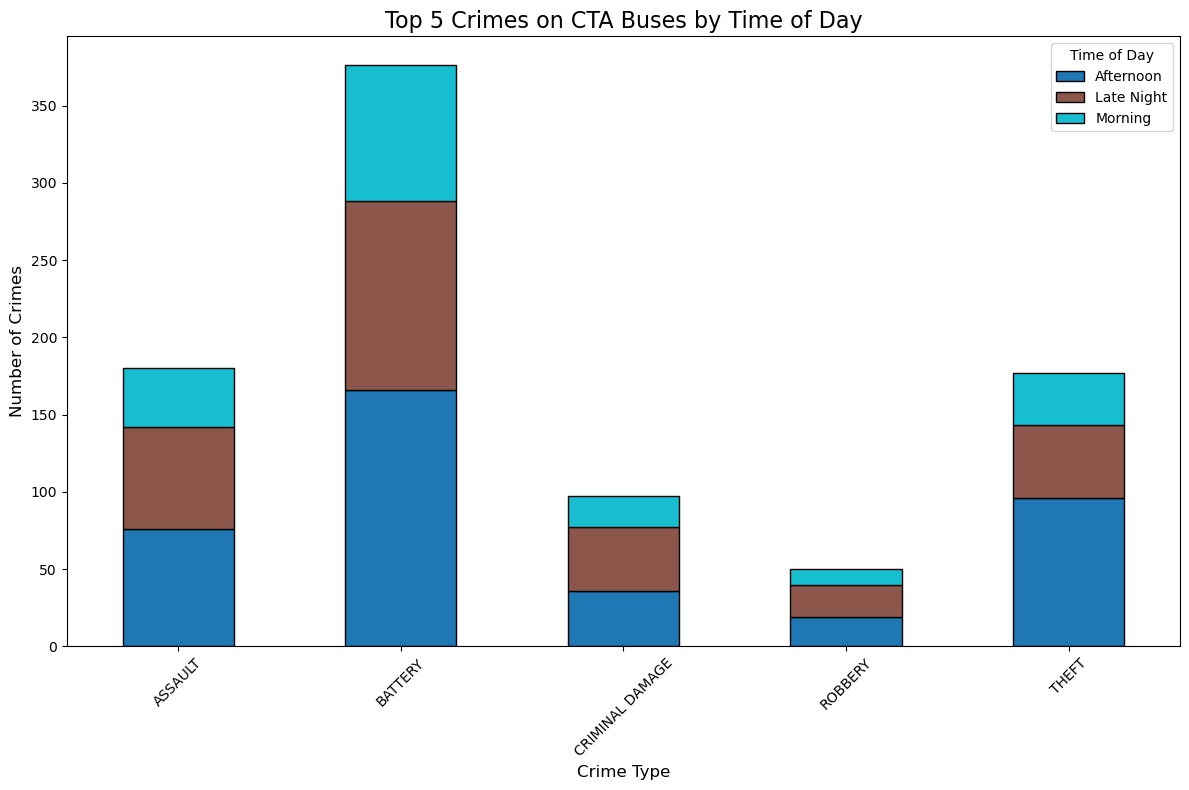

In [17]:
# Identifying the top 5 most frequent crimes on CTA Buses
top_5_cta_bus_crimes = cta_bus_crimes['PRIMARY DESCRIPTION'].value_counts().head(5)

# Filtering the data for the top 5 crimes
top_5_cta_bus_crime_data = cta_bus_crimes[cta_bus_crimes['PRIMARY DESCRIPTION'].isin(top_5_cta_bus_crimes.index)]

# Grouping by PRIMARY DESCRIPTION and TIME OF DAY for the top 5 crimes
top_5_cta_bus_crime_time = top_5_cta_bus_crime_data.groupby(['PRIMARY DESCRIPTION', 'TIME OF DAY']).size().reset_index(name='COUNT')

# Pivoting the data for better visualization
top_5_cta_bus_crime_time_pivot = top_5_cta_bus_crime_time.pivot(index='PRIMARY DESCRIPTION', columns='TIME OF DAY', values='COUNT').fillna(0)

# Plotting the stacked bar chart
top_5_cta_bus_crime_time_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10', edgecolor='black')

# Adding titles and labels
plt.title('Top 5 Crimes on CTA Buses by Time of Day', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Time of Day', fontsize=10)
plt.tight_layout()

# Displaying the plot
plt.show()


In [18]:
cta_train_crime_time = cta_train_crimes.groupby(['PRIMARY DESCRIPTION', 'TIME OF DAY']).size().reset_index(name='COUNT')

cta_train_crime_time = cta_train_crime_time.sort_values(by=['PRIMARY DESCRIPTION', 'COUNT'], ascending=[True, False])

In [19]:
# Identifying the top 5 most frequent crimes on CTA Trains
top_5_cta_train_crimes = cta_train_crimes['PRIMARY DESCRIPTION'].value_counts().head(5)

# Filtering the data for the top 5 crimes
top_5_cta_train_crime_data = cta_train_crimes[cta_train_crimes['PRIMARY DESCRIPTION'].isin(top_5_cta_train_crimes.index)]

# Grouping by PRIMARY DESCRIPTION and TIME OF DAY for the top 5 crimes
top_5_cta_train_crime_time = top_5_cta_train_crime_data.groupby(['PRIMARY DESCRIPTION', 'TIME OF DAY']).size().reset_index(name='COUNT')

# Displaying the results for reference
# import ace_tools as tools; tools.display_dataframe_to_user(name="Top 5 Crimes on CTA Trains by Time of Day", dataframe=top_5_cta_train_crime_time)

# top_5_cta_train_crime_time.head()


# Top 5 Crimes on CTA Trains by Time of Day

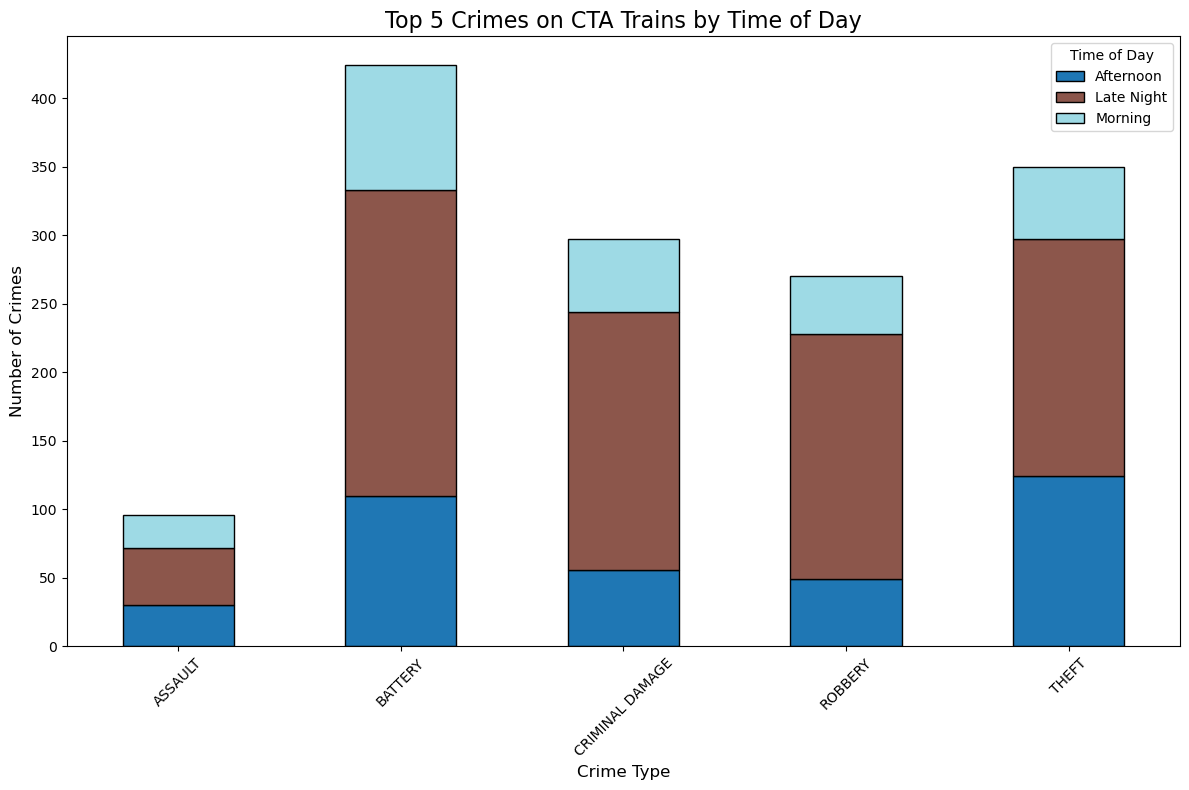

In [20]:
# Grouping and aggregating data to find the top 5 crimes on CTA Trains by Time of Day
cta_train_crime_totals = cta_train_crimes.groupby(['PRIMARY DESCRIPTION', 'TIME OF DAY']).size().reset_index(name='COUNT')

# Identifying the top 5 crimes overall on CTA Trains by summing across all times of day
top_5_cta_train_crimes = (
    cta_train_crime_totals.groupby('PRIMARY DESCRIPTION')['COUNT'].sum()
    .nlargest(5)
    .index
)

# Filtering the data for only the top 5 crimes
top_5_cta_train_crime_data = cta_train_crime_totals[cta_train_crime_totals['PRIMARY DESCRIPTION'].isin(top_5_cta_train_crimes)]

# Pivoting the data for visualization
top_5_cta_train_crime_pivot = top_5_cta_train_crime_data.pivot(index='PRIMARY DESCRIPTION', columns='TIME OF DAY', values='COUNT').fillna(0)

# Plotting the stacked bar chart
top_5_cta_train_crime_pivot.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20', edgecolor='black')

# Adding titles and labels
plt.title('Top 5 Crimes on CTA Trains by Time of Day', fontsize=16)
plt.xlabel('Crime Type', fontsize=12)
plt.ylabel('Number of Crimes', fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.legend(title='Time of Day', fontsize=10)
plt.tight_layout()

# Displaying the plot
plt.show()
